# COVID-19 Data Visualization

In this notebook, we study how to visualize COVID-19 data.

## Visualization Examples

+ Johns Hopkins COVID-19 data trackers https://coronavirus.jhu.edu/data
+ CDC COVID-19 Data Visualization https://www.cdc.gov/coronavirus/2019-ncov/covid-data/data-visualization.htm
+ Information is Beautiful https://informationisbeautiful.net/visualizations/covid-19-coronavirus-infographic-datapack/

## Data Sources

+ USA Facts US COVID-19 Cases https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
+ CDC Data catalog https://data.cdc.gov/browse?limitTo=datasets
+ John Hopkins COVID-19 data https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
+ Kaggle COVID-19 Data Challenge https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/tasks

# Task 1: Effective Data Visualization

Look at the visualization of the the following two COVID-19 data trackers.
+ https://coronavirus.jhu.edu/us-map
+ https://covid.cdc.gov/covid-data-tracker/#cases_totalcases

Discuss with your breakout group on the following questions:
1. What types of plots that the sites use?
1. Which sites gives a better visualization effects?
1. Pick one plot that your group would like to create using Python?

Select a person to present your discussion to the class.

# Task 2: Visauliza US COVID-19 Cases 

## Set up the enviornment.

To use the plotly package, install dash and jupyter-dash into the Python enviornment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Prepare Data

### Retrieve data sets from USA Facts

In [2]:
df_cases = pd.read_csv("https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv")
df_deaths = pd.read_csv("https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv")
df_population = pd.read_csv("https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv")

In [3]:
df_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1492,1498,1504,1508,1522,1544,1551,1565,1576,1585
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,4686,4713,4730,4757,4787,4833,4886,4922,4959,4978
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,776,777,778,778,778,785,786,792,794,801
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,576,581,583,589,591,594,602,604,607,610


In [4]:
df_deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,24
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,46,46,46,46,46,46,47,47,47,47
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


In [5]:
df_population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


### Prepare a State Summary Data 

In [6]:
df_state_cases = df_cases.drop(['countyFIPS', 'County Name', 'stateFIPS'], axis=1).groupby('State').agg(np.sum)
# df_state_cases

### Create a Daily Cases Data Frame

In [7]:
df_daily_cases = df_state_cases.transpose()
df_daily_cases.set_index(pd.to_datetime(df_daily_cases.index), inplace=True)
df_daily_cases.index.name = 'Date'
# df_daily_cases

In [8]:
df_daily_cases.columns

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='State')

In [9]:
df_daily_cases.shape

(237, 51)

## Add a US Columns

In [10]:
df_daily_cases['US'] = df_daily_cases.sum(axis=1)
df_daily_cases

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,US
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2020-01-26,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,6020,135565,66804,206993,750062,60183,54093,14412,18466,654731,...,168237,658588,56048,130519,1660,78464,84880,12002,4196,6346816
2020-09-11,6112,136703,67911,207521,755495,60491,54326,14493,18559,658380,...,169856,662083,56657,131637,1668,79011,86250,12168,4260,6393184
2020-09-12,6216,137646,68309,208126,758504,60904,54326,14552,18726,661569,...,170891,666524,57300,132939,1677,79476,87603,12518,4292,6432355


## Plot US Daily Cases

In [11]:
### Plot the accumlated cases

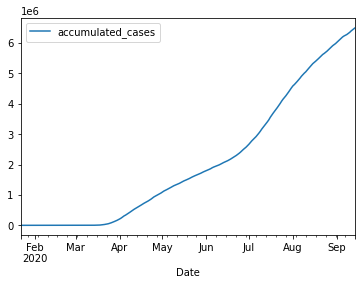

In [12]:
us_daily_cases = pd.DataFrame({"accumulated_cases": df_daily_cases['US']})
us_daily_cases.plot()

In [13]:
us_daily_cases = pd.DataFrame({"accumulated_cases": df_daily_cases['US']})
us_daily_cases['new_cases'] = us_daily_cases["accumulated_cases"] - us_daily_cases["accumulated_cases"].shift(1)

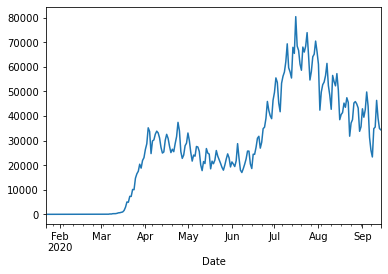

In [14]:
ax = us_daily_cases['new_cases'].plot()

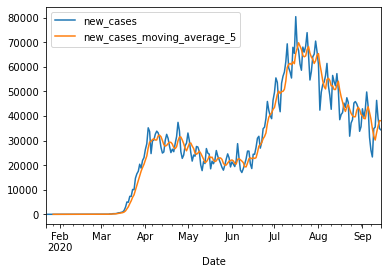

In [15]:
us_daily_cases['new_cases_moving_average_5'] = us_daily_cases['new_cases'].rolling(5).mean()
us_daily_cases[['new_cases', 'new_cases_moving_average_5']].plot()


## Question 2: Plot SC and NY Daily New Cases

Work with your group, plot the following two figures.

1. In the same figure, plot the SC and NY daily New Cases
1. Plot the SC and NY daily New Cases side by side

## Question 3: Plot the top 10 states by the total number of cases by September 14

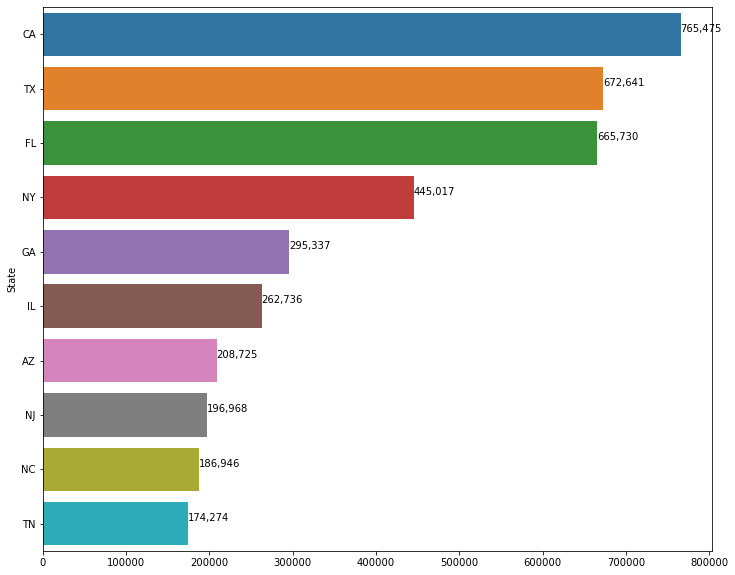

In [17]:
df_state_cases['9/14/20']
top_10 = df_state_cases['9/14/20'].sort_values(ascending=False).head(10)
fig, ax = plt.subplots(1, 1, figsize=(12,10))
sns.barplot(top_10.values, top_10.index, ax=ax)
for i, (state, value) in enumerate(zip(top_10.index, top_10.values)):
    ax.text(value,i-0.05,f'{value:,.0f}',size=10)

## Question 4: Plot the highest death rate of all states on 9/14

In [20]:
df_state_cases = df_cases.drop(['countyFIPS', 'County Name', 'stateFIPS'], axis=1).groupby('State').agg(np.sum)
df_state_deadth = df_deaths.drop(['countyFIPS', 'County Name', 'stateFIPS'], axis=1).groupby('State').agg(np.sum)
df_sep14 = pd.DataFrame({'Total Cases': df_state_cases['9/14/20'], 'Total Deaths': df_state_deadth['9/14/20']})

In [21]:
df_sep14["Death Rate"] = df_sep14['Total Deaths'] / df_sep14['Total Cases']

In [22]:
sorted_death_rate = df_sep14["Death Rate"].sort_values(ascending=False)

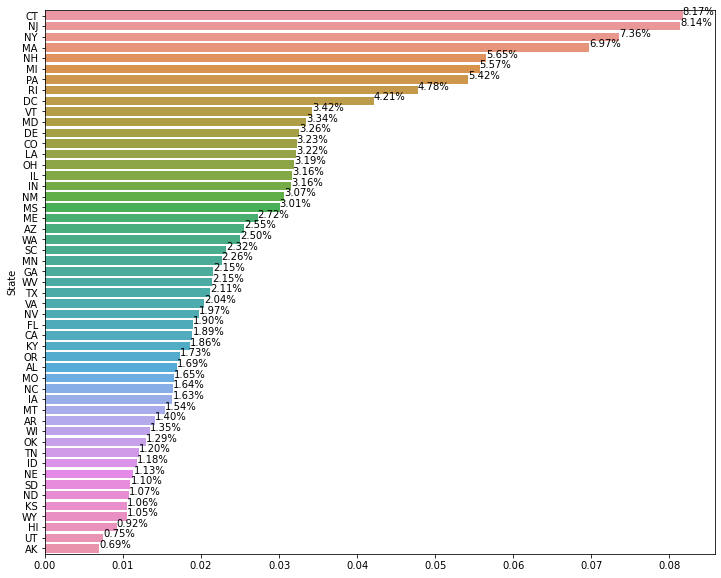

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
sns.barplot(sorted_death_rate.values, sorted_death_rate.index, ax=ax)
for i, (state, value) in enumerate(zip(sorted_death_rate.index, sorted_death_rate.values)):
    ax.text(value,i-0.05,f'{value * 100:,.02f}%',size=10)

# Create Maps

Maps are very useful to display geographic data. There are multiple packages for plotting maps. For example, the Python Data Science Handbook describes Basemap toolkit. Other map grpahing libraries are availale. For example, the plotly graphing library (https://plotly.com/python/maps/) provide multiple functions for creating maps. 

Here, we show an example to plot a Choropleth map of COVID-19 cases using John Hopkins's COVID-19 published on  github(https://github.com/CSSEGISandData/COVID-19). 

A Choropleth Map is a map composed of colored polygons. It is used to represent spatial variations of a quantity. You can find more information about choropleth maps at https://en.wikipedia.org/wiki/Choropleth_map.

In [26]:
## Get the source data
date =  '09-14-2020'
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data'
data_url = '{}/csse_covid_19_daily_reports/{}.csv'.format(base_url, date)
df = pd.read_csv(data_url)
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-15 03:22:50,33.93911,67.709953,38772,1425,32073,5274.0,Afghanistan,99.598388,3.675333
1,NaN,NaN,NaN,Albania,2020-09-15 03:22:50,41.15330,20.168300,11520,338,6615,4567.0,Albania,400.305789,2.934028
2,NaN,NaN,NaN,Algeria,2020-09-15 03:22:50,28.03390,1.659600,48496,1620,34204,12672.0,Algeria,110.592580,3.340482
3,NaN,NaN,NaN,Andorra,2020-09-15 03:22:50,42.50630,1.521800,1438,53,945,440.0,Andorra,1861.127289,3.685675
4,NaN,NaN,NaN,Angola,2020-09-15 03:22:50,-11.20270,17.873900,3439,136,1324,1979.0,Angola,10.463616,3.954638


In [27]:
## Preprocess the data
### Drop unused columns
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,33.93911,67.709953,38772,1425,32073,5274.0,99.598388,3.675333
1,Albania,41.15330,20.168300,11520,338,6615,4567.0,400.305789,2.934028
2,Algeria,28.03390,1.659600,48496,1620,34204,12672.0,110.592580,3.340482
3,Andorra,42.50630,1.521800,1438,53,945,440.0,1861.127289,3.685675
4,Angola,-11.20270,17.873900,3439,136,1324,1979.0,10.463616,3.954638


In [28]:
### Group data by country
cases_by_countries = df.groupby("Country")[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
cases_by_countries.head()

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,38772,5274.0,32073,1425
1,Albania,11520,4567.0,6615,338
2,Algeria,48496,12672.0,34204,1620
3,Andorra,1438,440.0,945,53
4,Angola,3439,1979.0,1324,136


In [ ]:
## Import the libaries
import plotly.express as px

In [ ]:
# help(px.choropleth)

In [ ]:
figure = px.choropleth(cases_by_countries, locations='Country', locationmode='country names', 
                       color='Confirmed', hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma,
                       range_color=[1, 1000000],
                       title='Countries with Confirmed cases on {}'.format(date))
figure.show()

In [ ]:
#?px.choropleth
#help(px.colors)

# Animation

In [1]:
%matplotlib inline

import matplotlib.animation as animation
import matplotlib.pyplot as plt  
import numpy as np  

from IPython.display import HTML

MovieWriter stderr:
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpls1mi7qa/temp.m4v']' returned non-zero exit status 127.

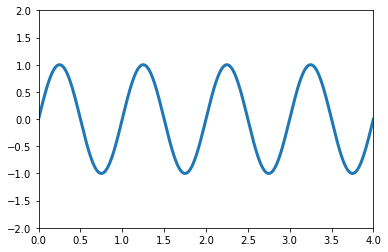

In [3]:
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()  
   
# marking the x-axis and y-axis 
axis = plt.axes(xlim =(0, 4),  
                ylim =(-2, 2))  
  
# initializing a line variable 
line, = axis.plot([], [], lw = 3)  
   
# data which the line will  
# contain (x, y) 
def init():  
    line.set_data([], []) 
    return line, 
   
def animate(i): 
    x = np.linspace(0, 4, 1000) 
   
    # plots a sine graph 
    y = np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(x, y) 
      
    return line, 
   
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True) 
HTML(anim.to_html5_video())